In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

test_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv", index_col='Id')
train_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv", index_col='Id')

print("setup complete")

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
setup complete


In [2]:
# Visualise data
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
# Drop NA target rows from train data
train_data = train_data.dropna(subset="SalePrice", axis=0)

# dropping rows with rare categories
train_data = train_data[train_data['Utilities'].str.contains('NoSeWa')==False]
train_data = train_data[train_data['Functional'].str.contains('Sev')==False]

is_multi = train_data['RoofMatl'].value_counts() > 1
train_data = train_data[train_data['RoofMatl'].isin(is_multi[is_multi].index)]

# removing columns occuring at time of sale
train_data = train_data.drop(columns=['MoSold','YrSold','SaleType','SaleCondition'], axis=1)
test_data = test_data.drop(columns=['MoSold','YrSold','SaleType','SaleCondition'], axis=1)

#train_data.columns[train_data.isin(['ClyTile']).any()]
#train_data.select_dtypes(["object"]).nunique()
train_data['RoofMatl'].value_counts()

RoofMatl
CompShg    1433
Tar&Grv      10
WdShngl       6
WdShake       5
Name: count, dtype: int64

In [5]:
X = train_data.copy()
y = X.pop("SalePrice")

# train test split
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [6]:
# Missing data imputation for train & validation
# Note that we do not include the test data here
from sklearn.impute import SimpleImputer

categorical_cols = [cname for cname in X_train.columns if X_train[cname].dtype == 'object']
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64','float64']]

cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='median')

X_train[categorical_cols] = cat_imputer.fit_transform(X_train[categorical_cols])
X_train[numerical_cols] = num_imputer.fit_transform(X_train[numerical_cols])

X_valid[categorical_cols] = cat_imputer.transform(X_valid[categorical_cols])
X_valid[numerical_cols] = num_imputer.transform(X_valid[numerical_cols])

In [7]:
# Ordinal encoding for train & validation data
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_train[categorical_cols] = ord_enc.fit_transform(X_train[categorical_cols])
X_valid[categorical_cols] = ord_enc.transform(X_valid[categorical_cols])

In [8]:
# Investigate MI scores
from sklearn.feature_selection import mutual_info_regression

num_mi_scores = mutual_info_regression(X_train[numerical_cols],y_train)
cat_mi_scores = mutual_info_regression(X_train[categorical_cols],y_train, discrete_features=True)

# Return MI scores
def return_mi_series(mi_scores, index):
    mi_scores = pd.Series(mi_scores, index=index)
    mi_scores = mi_scores.sort_values(ascending=False)
    mi_series = pd.Series(mi_scores, index=index).sort_values(ascending=False)
    return mi_series

In [9]:
# Numerical MI scores
numerical_mi_series = return_mi_series(num_mi_scores, numerical_cols)
numerical_mi_series

OverallQual      0.594025
GrLivArea        0.502675
TotalBsmtSF      0.380924
GarageArea       0.374862
GarageCars       0.367297
1stFlrSF         0.338381
YearBuilt        0.329782
MSSubClass       0.275989
GarageYrBlt      0.267172
YearRemodAdd     0.253561
FullBath         0.249095
TotRmsAbvGrd     0.202529
2ndFlrSF         0.188072
LotFrontage      0.184865
Fireplaces       0.178254
BsmtFinSF1       0.168374
OpenPorchSF      0.161929
LotArea          0.154027
OverallCond      0.124122
BsmtUnfSF        0.123522
WoodDeckSF       0.105588
MasVnrArea       0.091842
HalfBath         0.077163
BedroomAbvGr     0.062479
BsmtFullBath     0.025246
EnclosedPorch    0.017847
ScreenPorch      0.017247
3SsnPorch        0.013845
KitchenAbvGr     0.012320
BsmtHalfBath     0.010103
PoolArea         0.009655
MiscVal          0.003622
BsmtFinSF2       0.000766
LowQualFinSF     0.000000
dtype: float64

In [10]:
# Categorical MI scores
categorical_mi_series = return_mi_series(cat_mi_scores, categorical_cols)
categorical_mi_series

Neighborhood    5.444329e-01
BsmtQual        3.313457e-01
ExterQual       3.230012e-01
KitchenQual     3.132424e-01
GarageFinish    2.157694e-01
Foundation      1.973733e-01
HeatingQC       1.727164e-01
BsmtFinType1    1.497485e-01
Exterior2nd     1.378395e-01
GarageType      1.309370e-01
MSZoning        1.259765e-01
Exterior1st     1.104830e-01
HouseStyle      1.001993e-01
FireplaceQu     8.645204e-02
LotShape        8.035356e-02
CentralAir      6.663502e-02
BsmtExposure    6.599929e-02
PavedDrive      5.125178e-02
MasVnrType      4.483012e-02
BldgType        4.321409e-02
Electrical      3.730869e-02
BsmtCond        3.324372e-02
Condition1      2.555418e-02
Fence           2.413863e-02
RoofStyle       2.252435e-02
LandContour     2.248154e-02
LotConfig       1.831989e-02
GarageQual      1.733262e-02
GarageCond      1.581585e-02
Heating         1.414970e-02
Alley           1.172182e-02
Functional      1.147204e-02
RoofMatl        1.058672e-02
ExterCond       6.906258e-03
LandSlope     

/tmp/ipykernel_13/538251256.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


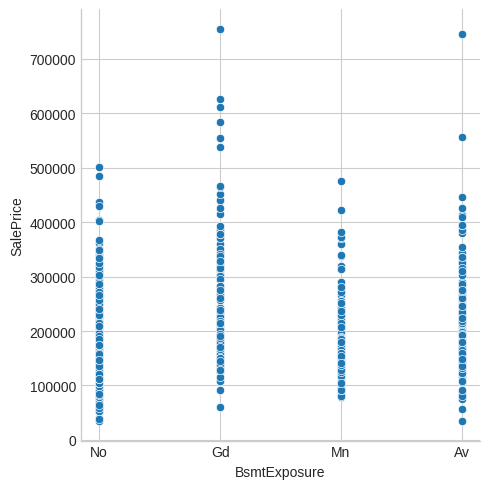

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn-whitegrid")
sns.relplot(x="BsmtExposure", y="SalePrice", data=train_data)

In [12]:
# Select top features
selected_num_features = numerical_mi_series[numerical_mi_series > 0.05].index.tolist()
selected_cat_features = categorical_mi_series[categorical_mi_series > 6.5e-02].index.tolist()

In [13]:
# exclude non-selected features
X_train = pd.concat([X_train[selected_cat_features], X_train[selected_num_features]], axis=1)
X_valid = pd.concat([X_valid[selected_cat_features], X_valid[selected_num_features]], axis=1)

X_valid.head()

,Neighborhood,BsmtQual,ExterQual,KitchenQual,GarageFinish,Foundation,HeatingQC,BsmtFinType1,Exterior2nd,GarageType,...,Fireplaces,BsmtFinSF1,OpenPorchSF,LotArea,OverallCond,BsmtUnfSF,WoodDeckSF,MasVnrArea,HalfBath,BedroomAbvGr
Id,,,,,,,,,,,,,,,,,,,,,
1237,16.0,2.0,2.0,2.0,1.0,2.0,0.0,5.0,15.0,3.0,...,0.0,0.0,27.0,2628.0,5.0,764.0,0.0,106.0,1.0,2.0
1393,12.0,3.0,3.0,3.0,1.0,1.0,3.0,0.0,6.0,1.0,...,1.0,769.0,144.0,7838.0,5.0,95.0,175.0,0.0,0.0,3.0
184,17.0,2.0,3.0,2.0,2.0,2.0,0.0,5.0,13.0,5.0,...,0.0,0.0,238.0,11426.0,5.0,1362.0,280.0,0.0,1.0,3.0
1422,13.0,2.0,3.0,3.0,1.0,1.0,3.0,0.0,10.0,1.0,...,1.0,360.0,55.0,4043.0,5.0,709.0,0.0,0.0,0.0,2.0
90,5.0,2.0,3.0,3.0,2.0,2.0,0.0,2.0,13.0,1.0,...,0.0,588.0,0.0,8070.0,5.0,402.0,0.0,0.0,0.0,3.0


In [14]:
# Set up XGBoost
from xgboost import XGBRegressor

model = XGBRegressor(random_state=0, n_estimators=500,
                      learning_rate=0.03)

model.fit(X_train, y_train,
         eval_set=[(X_valid, y_valid)],
         verbose=False)

prediction = model.predict(X_valid)

In [15]:
# Model quality check
from sklearn.metrics import mean_squared_log_error as msle

model_rmsle = np.sqrt(msle(y_valid,prediction))

# Baseline prediction
baseline_pred = np.full_like(y_valid, np.expm1(np.mean(np.log1p(y_train))))
baseline_rmsle = np.sqrt(msle(y_valid, baseline_pred))

print("Model RMSLE:", model_rmsle)
print("Baseline RMSLE:", baseline_rmsle)

Model RMSLE: 0.14596145559753024
Baseline RMSLE: 0.38290543391129067


In [16]:
# Re-fit imputer and encoder to full training dataset
X[categorical_cols] = cat_imputer.fit_transform(X[categorical_cols])
X[numerical_cols] = num_imputer.fit_transform(X[numerical_cols])
X[categorical_cols] = ord_enc.fit_transform(X[categorical_cols])

# Transform test set
test_data[categorical_cols] = cat_imputer.transform(test_data[categorical_cols])
test_data[numerical_cols] = num_imputer.transform(test_data[numerical_cols])
test_data[categorical_cols] = ord_enc.transform(test_data[categorical_cols])

# Select only high MI columns
X = pd.concat([X[selected_cat_features], X[selected_num_features]], axis=1)
test_data = pd.concat([test_data[selected_cat_features], test_data[selected_num_features]], axis=1)

In [17]:
# Final model & prediction
model.fit(X,y)
final_prediction = model.predict(test_data)

# Submission
output = pd.DataFrame({'Id':test_data.index,
                      'SalePrice':final_prediction})
output.to_csv("/kaggle/working/submission.csv", index = False)